In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
path = "./DatasetV03/1. No DR signs/1.jpg"

In [16]:
def blur_image_median(image, kernel_size=5):
    blurred_image = cv2.medianBlur(image, kernel_size)
    return blurred_image

def detect_edges_sobel(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Sobel edge detection
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine horizontal and vertical edge images
    edge_image = cv2.magnitude(sobelx, sobely)
    
    _, binary_edge_image = cv2.threshold(edge_image, 20, 255, cv2.THRESH_BINARY)
    
    return binary_edge_image

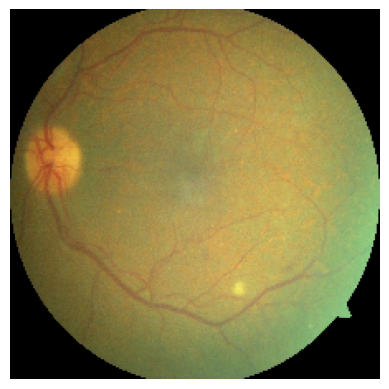

In [4]:
image_size = (224, 224)
image = cv2.imread(path)
image = cv2.resize(image, image_size)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image)

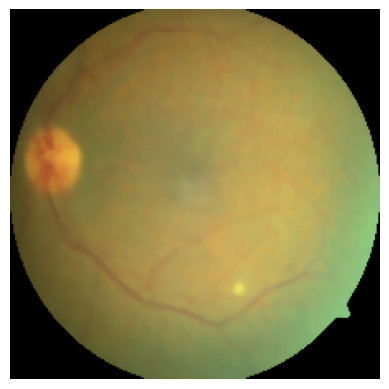

In [8]:
# Blur the image using median filter
blurred_image = blur_image_median(image)
# Display the results
plt.axis("off")
plt.imshow(blurred_image)

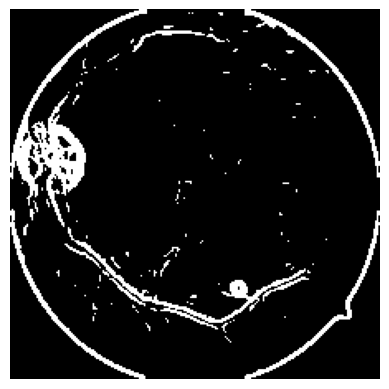

In [19]:
# Detect edges in the image using Sobel edge detection
edge_image = detect_edges_sobel(blurred_image)
plt.axis("off")
plt.imshow(edge_image, cmap="gray")